In [12]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
#Import libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split,  RandomizedSearchCV 
from sklearn import metrics 
from scipy.stats import randint 

In [14]:
#Create dataframe using the top 10 variables selected from the previous assignment 
loan = pd.read_csv('/content/drive/MyDrive/AAI510/MODULE1/home-credit-default-risk/application_train.csv',
                   usecols = ['TARGET', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 
                              'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
                              'OCCUPATION_TYPE', 'NAME_EDUCATION_TYPE', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY'])
print('Training dataset size:' , loan.shape)
print(loan.head())

Training dataset size: (307511, 11)
   TARGET FLAG_OWN_CAR FLAG_OWN_REALTY  AMT_INCOME_TOTAL  AMT_CREDIT  \
0       1            N               Y          202500.0    406597.5   
1       0            N               N          270000.0   1293502.5   
2       0            Y               Y           67500.0    135000.0   
3       0            N               Y          135000.0    312682.5   
4       0            N               Y          121500.0    513000.0   

   AMT_ANNUITY  AMT_GOODS_PRICE            NAME_EDUCATION_TYPE  DAYS_BIRTH  \
0      24700.5         351000.0  Secondary / secondary special       -9461   
1      35698.5        1129500.0               Higher education      -16765   
2       6750.0         135000.0  Secondary / secondary special      -19046   
3      29686.5         297000.0  Secondary / secondary special      -19005   
4      21865.5         513000.0  Secondary / secondary special      -19932   

   DAYS_EMPLOYED OCCUPATION_TYPE  
0           -637        Lab

In [15]:
#Check variable types
loan.dtypes

TARGET                   int64
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
AMT_INCOME_TOTAL       float64
AMT_CREDIT             float64
AMT_ANNUITY            float64
AMT_GOODS_PRICE        float64
NAME_EDUCATION_TYPE     object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
OCCUPATION_TYPE         object
dtype: object

In [16]:
#Drop rows with Nan values and convert object types to int
loan = loan.dropna()

for column in loan:
  if loan[column].dtypes == 'object':
    loan[column] = loan[column].astype('category')
    loan[column] = loan[column].cat.codes

In [17]:
#Assign features and targets, split dataset into training and testing,
#build and train the decision tree, and evaluate the model
y = loan['TARGET']
x = loan.drop(columns=['TARGET']) 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
clf = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy') 
clf = clf.fit(X_train, y_train)

pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)

print("Train Accuracy:", metrics.accuracy_score(y_train, pred_train))
print("Test Accuracy:", metrics.accuracy_score(y_test, pred_test))

Train Accuracy: 0.9125239317404525
Test Accuracy: 0.9105694912039451


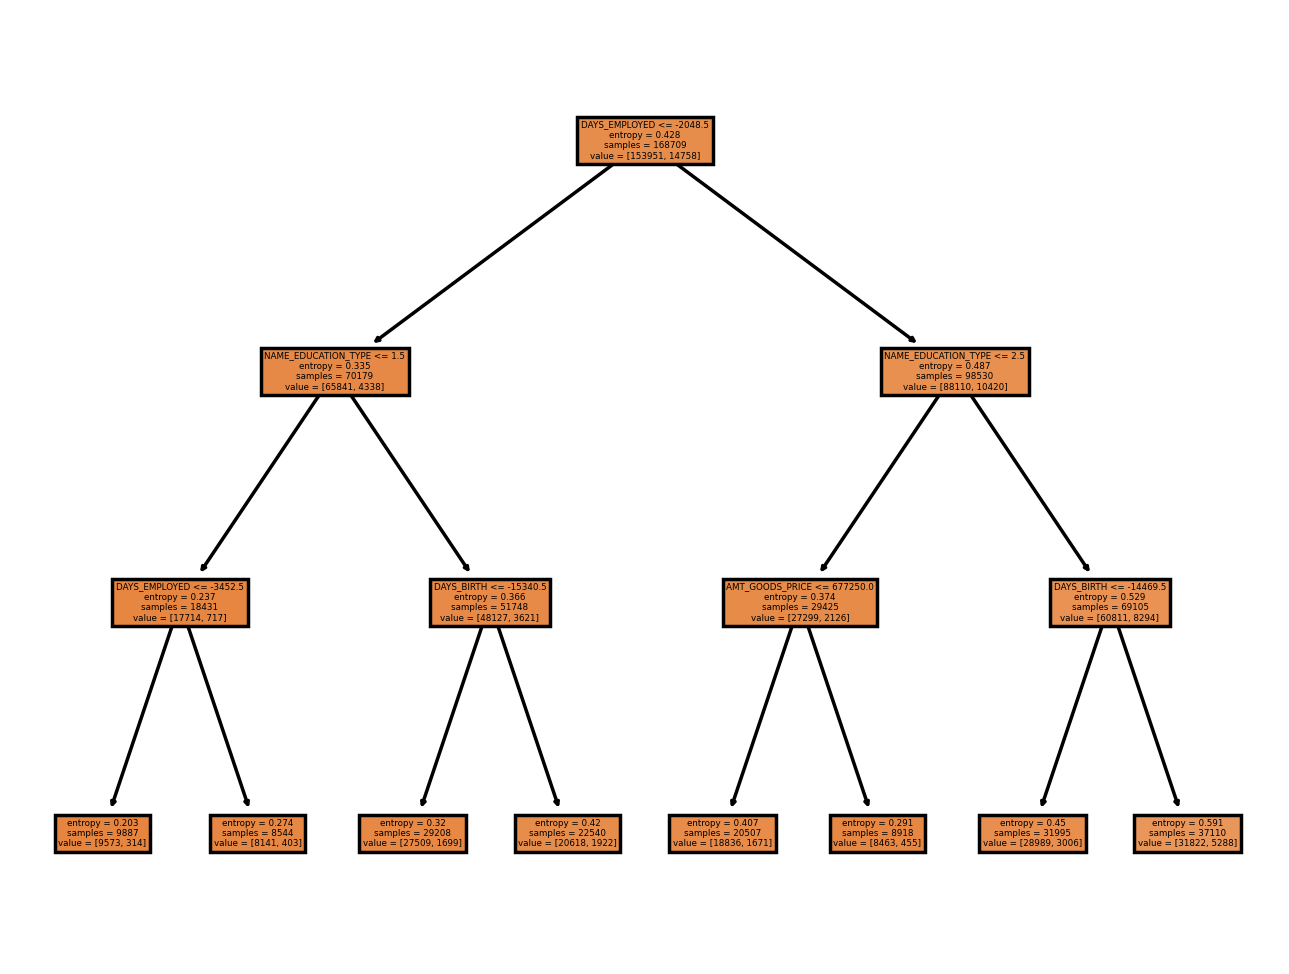

In [18]:
#Visualizing the Tree
plt.rcParams['figure.dpi'] = 250
f_names=list(x.columns)
tree.plot_tree(clf, filled=True, feature_names=f_names)
plt.show()

In [19]:
#Load all the features from the training dataset and repeat previous steps with 
#new dataframe to build a random forest
df = pd.read_csv('/content/drive/MyDrive/AAI510/MODULE1/home-credit-default-risk/application_train.csv')

df = df.dropna()

for column in df:
  if df[column].dtypes == 'object':
    df[column] = df[column].astype('category')
    df[column] = df[column].cat.codes

y = df['TARGET']
x = df.drop(columns=['TARGET']) 

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
rf = RandomForestClassifier(max_depth=3, random_state=10)
rf = rf.fit(X_train, y_train)

pred_train = rf.predict(X_train)
pred_test = rf.predict(X_test)

print("Train Accuracy:", metrics.accuracy_score(y_train, pred_train))
print("Test Accuracy:", metrics.accuracy_score(y_test, pred_test))

Train Accuracy: 0.9372184275541345
Test Accuracy: 0.9453805926786751


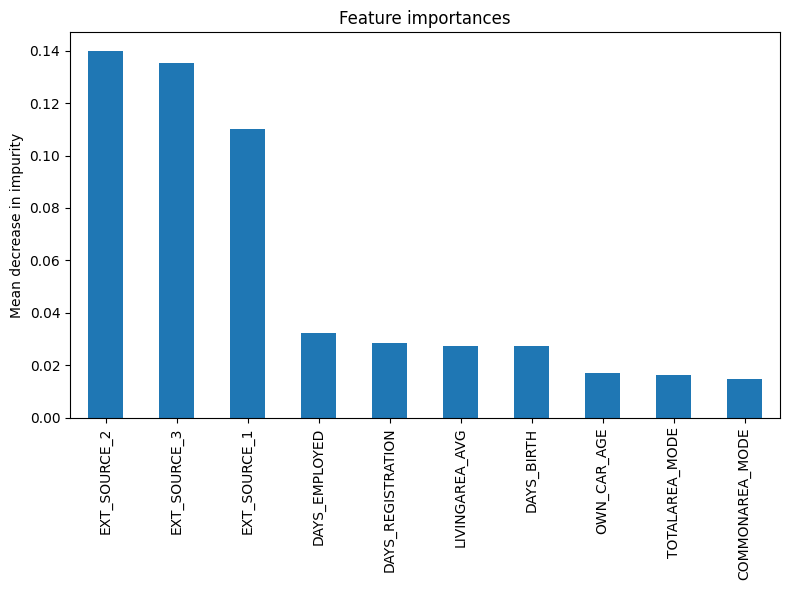

In [20]:
#Plot the variable importance chart and list the 10 features that are most important 
features = pd.Series(rf.feature_importances_, index=x.columns)
features.sort_values(ascending=False, inplace=True)
plt.rcParams['figure.dpi'] = 100
fig, ax = plt.subplots(figsize=(8,6))
features.head(10).plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

The two variables that I chose that are also in the top 10 from the variable importance chart are DAYS_BIRTH and DAYS_EMPLOYED. The original set of features was selected using my knowledge of loans and the new features are computed as the mean and standard deviation of accumulation of the impurity decrease within each tree. The new features are more accurate and significant. 

New Single Classification Tree Train Accuracy: 0.9418705870973982
New Single Classification Tree Test Accuracy: 0.9361702127659575
New Random Forest Train Accuracy: 0.9412902601799014
New Random Forest Test Accuracy: 0.9365570599613153


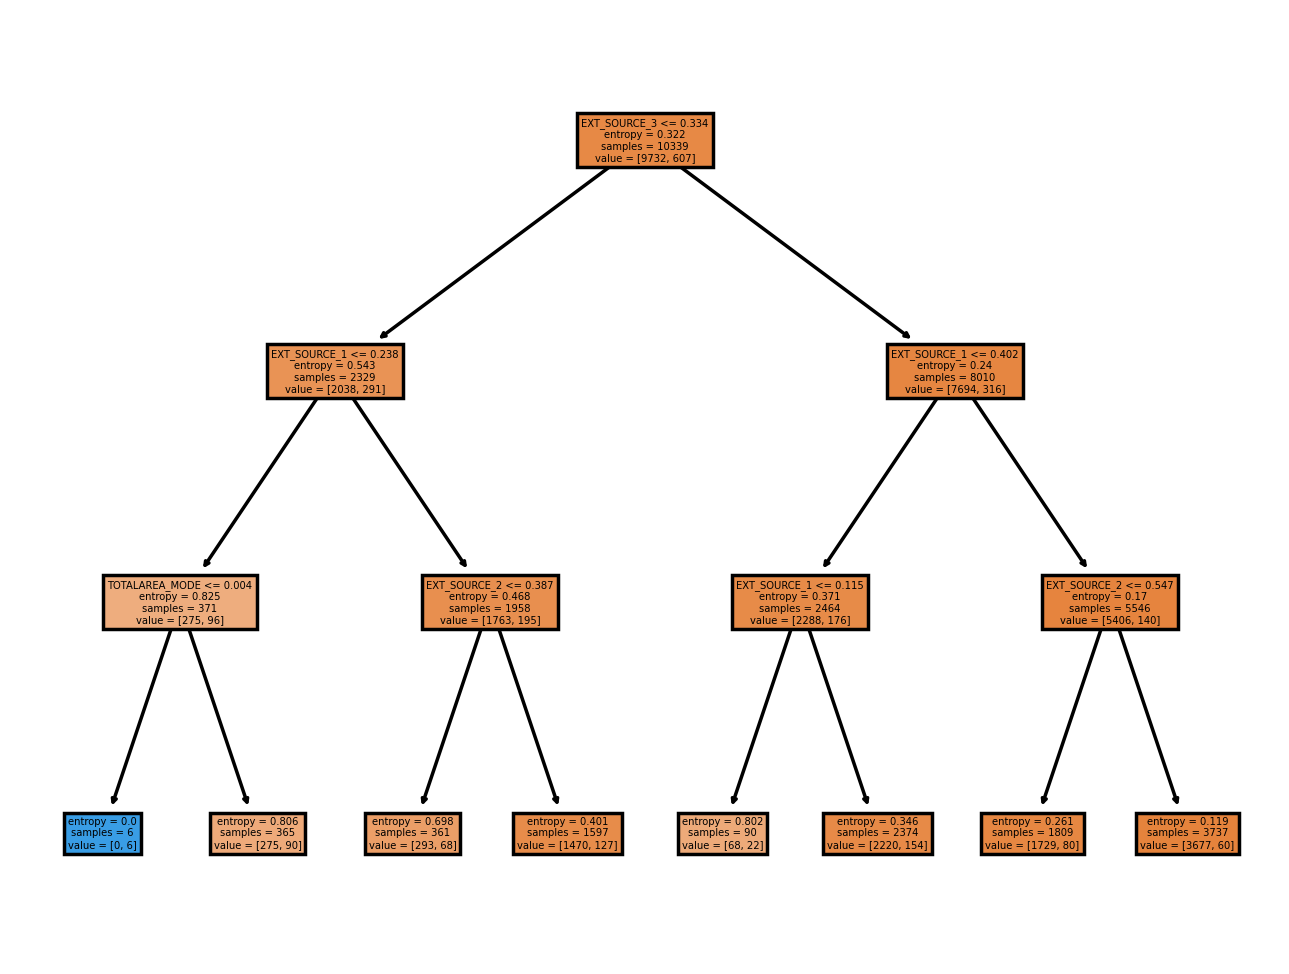

In [23]:

#Rebuild random forest classifier with the 10 variables found previously
df1 = pd.read_csv('/content/drive/MyDrive/AAI510/MODULE1/home-credit-default-risk/application_train.csv',
                   usecols = ['TARGET', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'EXT_SOURCE_1', 
                              'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'LIVINGAREA_AVG',
                              'DAYS_BIRTH', 'OWN_CAR_AGE', 'TOTALAREA_MODE', 'COMMONAREA_MODE'])

df1 = df1.dropna()

for column in df1:
  if df1[column].dtypes == 'object':
    df1[column] = df1[column].astype('category')
    df1[column] = df1[column].cat.codes

y = df1['TARGET']
x = df1.drop(columns=['TARGET']) 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

rf1 = RandomForestClassifier(max_depth=3, random_state=10)
rf1 = rf1.fit(X_train, y_train)

clf1 = tree.DecisionTreeClassifier(max_depth=3, criterion='entropy') 
clf1 = clf1.fit(X_train, y_train)

pred_train1 = rf1.predict(X_train)
pred_test1 = rf1.predict(X_test)
pred_train2 = clf1.predict(X_train)
pred_test2 = clf1.predict(X_test)

plt.rcParams['figure.dpi'] = 250
f_names=list(x.columns)
tree.plot_tree(clf1, filled=True, feature_names=f_names)

print("New Single Classification Tree Train Accuracy:", metrics.accuracy_score(y_train, pred_train2))
print("New Single Classification Tree Test Accuracy:", metrics.accuracy_score(y_test, pred_test2))
print("New Random Forest Train Accuracy:", metrics.accuracy_score(y_train, pred_train1))
print("New Random Forest Test Accuracy:", metrics.accuracy_score(y_test, pred_test1))
plt.show()
print('\n') #pdf printing purposes
print('\n')
print('\n')
print('\n')
print('\n')

For the classification trees made, the accuracy and generalization were about equal when compared within each set of features (0.94 and 0.91). However, the tree created using the variable importance plot had better results than the tree generated using my initial reasoning. This is seen from the accuracy results as well as in the tree visualization, where the second tree contains a leaf when using the same depth. Additionally, the entropy values in the node of the second tree generated are consistantly higher than the first tree.     

For the random forests made, the accuracy and generalization using all the features and only the 10 most important are all about 0.94. This supports the reasoning that random forests are not sensitive to the number of features it has to consider at each step.     